In [299]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import math
df_spy=pd.read_csv("spy.csv")
df_NVDA=pd.read_csv("NVDA.csv")


In [300]:
from tempfile import tempdir


def label_print(df): #print the label for every stock day
    label=[]
    for i in range(len(df)):
        if df["Open"][i]<df["Close"][i]:
            label.append("Long")
        elif df["Open"][i]>df["Close"][i]:
            label.append("short")
        elif df["Open"][i]==df["Close"][i]:
            label.append("No Change")
    df["label"]=label


def night_trade(df):# compute the 
    profit=[]
    stock_position=0
    cash_position=100
    final_res=0
    for i in range(0,len(df)-1):
        if (df["label"][i]=="Long"):#When the stock label is Long Posistion
            temp_a=cash_position
            stock_position=cash_position/df["Close"][i]
            cash_position=stock_position*df["Open"][i+1]
            temp_b=cash_position-temp_a
            profit.append(temp_b)
            #print (cash_position)
        
        elif[df["label"][i]=="short"]:#when the stock label is Short Posistion
            temp_a=cash_position
            stock_position=cash_position/df["Open"][i+1]
            cash_position=stock_position*df["Close"][i]
            #print(cash_position)
            temp_b=cash_position-temp_a
            profit.append(temp_b)
        
        elif[df["label"][i]=="No Change"]:
            profit.append(0)
    profit.append(0)
    df["profit"]=profit
    return cash_position
        
        
        
    

<mark><font color=red size=4 face=SimHei>Question#1. what is the average nightly profit for your stocka and ”spy”? Since you always start with $100, this number will coincide with percentage profit.<font><mark>

In [301]:
label_print(df_spy)
spy=night_trade(df_spy)

yield_return_spy=(((spy-100)/100)/len(df_spy))*100
ave_night_proft_spy=(spy-100)/(len(df_spy))
print("For spy stock:")
print("the final cash amount is",spy,"the final profit is",spy-100)
print("weather percentage profit equal to average nightly profit?",yield_return_spy==ave_night_proft_spy)
print("average nightly profit for spy is",ave_night_proft_spy,"%")

label_print(df_NVDA)
nvda=night_trade(df_NVDA)
yield_return_nvda=(((nvda-100)/100)/len(df_NVDA))*100
ave_night_proft_nvda=(nvda-100)/(len(df_NVDA))
print("\n","For NVDA stock:")
print("the final cash amount is",nvda,"the final profit is",nvda-100)
print("weather percentage profit equal to average nightly profit?",yield_return_nvda==ave_night_proft_nvda)
print("average nightly profit for spy is",ave_night_proft_nvda,"%")
#print(df_spy)


For spy stock:
the final cash amount is 91.11341634863035 the final profit is -8.886583651369648
weather percentage profit equal to average nightly profit? True
average nightly profit for spy is -0.007064056956573647 %

 For NVDA stock:
the final cash amount is 343.84898359325905 the final profit is 243.84898359325905
weather percentage profit equal to average nightly profit? True
average nightly profit for spy is 0.19383861970847302 %



<mark><font color=red size=4 face=SimHei>Question #2 is the profit from ”long” positions (when you buy) higher or lower than your profit from ’short” positions (when you sell short)? What is more profitable: long or short positions?<font><mark>


In [302]:
# night_trade_profit(df_spy)
long_profit_spy=float(df_spy.loc[(df_spy["label"]=="Long"),:]["profit"].sum())
short_profit_spy=float(df_spy.loc[(df_spy["label"]=="short"),:]["profit"].sum())


print("the profit of long position trading(100$ principal) in night for spy is",long_profit_spy,"the profit of short position trading(100$ principal) in night for spy is",short_profit_spy)

# night_trade_profit(df_NVDA)
long_profit_nvda=float(df_NVDA.loc[(df_NVDA["label"]=="Long"),:]["profit"].sum())
short_profit_nvda=float(df_NVDA.loc[(df_NVDA["label"]=="short"),:]["profit"].sum())
print("the profit of long position trading(100$ principal) in night for NVDA is",long_profit_nvda,"the profit of short position trading(100$ principal) in night for nvda is",short_profit_nvda)
print("According to the results, long position is easier to make profits than short position")

#df_NVDA.to_csv("NVDA_OUTPUT.cvs")

the profit of long position trading(100$ principal) in night for spy is 20.81255680903415 the profit of short position trading(100$ principal) in night for spy is -28.81153146559393
the profit of long position trading(100$ principal) in night for NVDA is 364.66475206666007 the profit of short position trading(100$ principal) in night for nvda is -127.05574994023583
According to the results, long position is easier to make profits than short position



<mark><font color=red size=4 face=SimHei>Question#3. suppose you add a restriction that you will trade only if the absolute value of daily return is more than some threshold value x (e.g. 5%). (for example, unless stock price rises or falls by more than 5%, you will not trade). With such a restriction, you will trade less frequently but maybe your profit per trade will increase. We would like to investigate this. Take 100 points for x from 0 to 10% and plot the average profit per trade. Please discuss your findings. Any patterns? Any optimal values for x?<font><mark>

In [303]:
def night_trade_5_pers(df):
    percentage=0
    if_over_5_pers=[]
    for i in range(len(df)):
        percentage=((df["Close"][i]-df["Open"][i])/df["Open"][i])*100
        if abs(percentage)>=5:
            if_over_5_pers.append("True")
        else:
            if_over_5_pers.append("False")
    df["if_over_5_pers"]=if_over_5_pers

        


This is the overnight profit on $100 of capital when the absolute percentage of daytime trading in spy stock exceeds 5%. [0.19913928]
This is the average of the profits up here. 0.19913927827174405


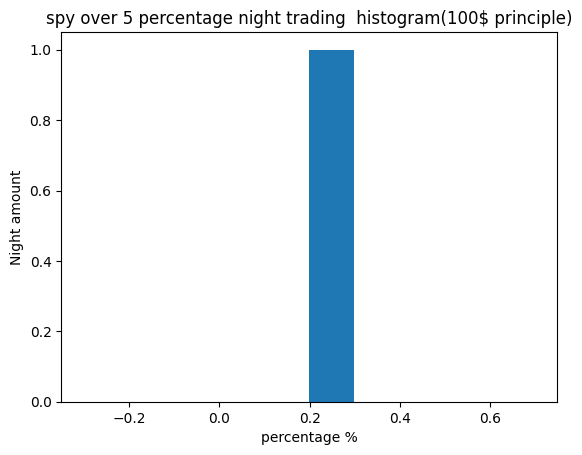

This is the overnight profit on $100 of capital when the absolute percentage of daytime trading in NVDA stock exceeds 5%. [  0.2189569   -1.20072777   0.14704389   3.14368264   0.16173086
  -1.92417814   3.10780514   6.39144495   2.6093711  -12.74341262
   0.83694586   1.39544459   1.82970474  -1.08568197   2.4516874
  -5.71231302  -0.5951727    3.76375882  -2.39443007   7.48494248
   3.76855652   1.03101903   4.50212931   1.53944615   0.83537275
   0.           4.88666371  -5.48824869  -4.47605203 -15.36015881
   5.05847464   0.03566237   3.67840613   6.20020546  -3.2046631
   6.78201615  -0.5129433    4.98399496  -4.47549094   0.54257157
  -6.70421979  -2.05776962  -9.66559019 -12.41099638   0.40785988
   3.81526989  13.67523837   2.10016396   5.0811272    7.06233359
   4.56038669]
This is the average of the profits up here. 0.4721052653507145


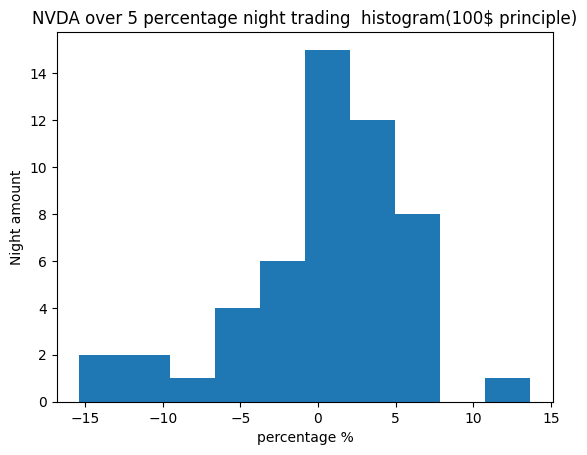

In [304]:


night_trade_5_pers(df_NVDA)
night_trade_5_pers(df_spy)


spy_5_pers_list=df_spy.loc[(df_spy["if_over_5_pers"]=="True"),:]["profit"].values
print("This is the overnight profit on $100 of capital when the absolute percentage of daytime trading in spy stock exceeds 5%.",spy_5_pers_list)
print("This is the average of the profits up here.",spy_5_pers_list.mean())
plt.title("spy over 5 percentage night trading  histogram(100$ principle)")
plt.xlabel("percentage %")
plt.ylabel("Night amount")
plt.hist(spy_5_pers_list)
plt.show()
#df_NVDA.to_csv("NVDA_test.csv")





NVDA_5_pers_list=df_NVDA.loc[(df_NVDA["if_over_5_pers"]=="True"),:]["profit"].values
print("This is the overnight profit on $100 of capital when the absolute percentage of daytime trading in NVDA stock exceeds 5%.",NVDA_5_pers_list)
print("This is the average of the profits up here.",NVDA_5_pers_list.mean())
plt.title("NVDA over 5 percentage night trading  histogram(100$ principle)")
plt.xlabel("percentage %")
plt.ylabel("Night amount")
plt.hist(NVDA_5_pers_list)
plt.show()
df_NVDA.to_csv("NVDA_output.csv")
df_spy.to_csv("SPY_output.csv")

<mark><font color=red size=4 face=SimHei>Question#4 perform the above analysis separately for long and short positions. Discuss your findings.<font><mark>


In general, the overall revenue of long Position is much higher than that of short position. In my opinion, it is very difficult for short position to make money in the night trading period. At the stock level, SPY is a very low-volatility stock. There was only one move of more than 5%, at least during the day. My pick of NVDA is an overall uptrend. So it's better to do night trading than SPY.

Question# 5 on the same plot, show the growth of your portfolio for your stock and SPY and buy-and-hold strategy
